# Cues for the Collective: The Cultural Significance of Online Novel Trends

**Yilin Xu**  
M.A. in Computational Social Science | University of Chicago  
Email: yilinxu1@uchicago.edu | [LinkedIn](https://www.linkedin.com/in/yilin-xu-367826202/) | [Github](https://github.com/yilinx-10)

### Motivation  
"A reader lives a thousand lives before he dies . . . The man who never reads lives only one." This quote speaks not only to the immersive power of literature but also to its enduring appeal as a form of emotional and psychological entertainment. Reading allows individuals to momentarily escape their own realities and inhabit the lives, emotions, and decisions of fictional characters. This capacity for narrative transport is at the heart of why readers return to stories again and again. Serialized storytelling has long held a unique place in global entertainment, from Dickensian novels to contemporary streaming series. In China, serialized online novels have evolved into a massive grassroots literary phenomenon, driven by a dynamic reader-author feedback loop. Platforms empower individual writers to publish content chapter-by-chapter, enabling real-time responses from readers and creating a data-rich environment for analyzing the interplay between narrative structure and audience engagement.

**I propose that trends in successful online novels can serve as indicators of shifting public norms and evolving societal mindsets, especially when considered alongside the characteristics of the reader population.**

### Background Information - China's Online Novel Market  
Since online novel platforms are not popular in the U.S. I decide to include a brief description of China’s online novel market as background information. I will also explain how China’s online novel market resembles and differs from other serialized entertainment industry using Netflix as example. Despite waves of state efforts in sanctioning certain topics, the online literature market in China remains a relatively loosely monitored grassroots alternative to traditional publishing businesses(Zhao, 2017). Although the first serialized online novels were written mainly by amateur writers and literary enthusiasts without financial incen- tives, the online literature market has evolved to become competitive and predominantly profit driven. According to China Internet Network Information Center (CNNIC)’s latest report published in August 2024, 516 million people, which is approximately 46.9% of the total Internet users in China, consume online literature (China Internet Network Informa- tion Center, 2024).  

The business model of a typical online novels platform is simple. There is close to zero barriers to entry. Anyone can register as an author and publish novels. If their chapters receive enough attention (views, subscriptions, etc.), online editors working for the platform will reach out with a contract. When one novel gathers enough subscriptions and has achieved enough word counts, authors can then label later chapters as VIP only (pay-to-read). Readers can purchase to read chapter by chapter. The price of a VIP chapter depends on the word count. Usually, it is calculated in terms of few cents per thousand words. The revenue is divided evenly or close to 6:4 between the author and the platform. Readers can also decide to pay additional tips to the author only. For successful novels, there will be opportunities for paper publications and IP adaptations, which generates far larger amount of profits for the authors. Hence, it is crucial for the author to pay attention to reader response and strategically adjust future chapters if they are financially motivated.

China’s online novel market and Netflix share similarities in their business models, as both rely on serialized content to retain audience engagement and generate revenue. Like Netflix, which releases series in episodes to maintain viewer interest and subscription renewals, online novel platforms publish content in chapters, allowing authors to build anticipation and monetize subsequent releases. However, a key difference lies in the accessibility and entry barriers for creators. While Netflix curates its content through professional production and licensing agreements, online novel platforms permit virtually anyone to publish and monetize their work, creating a more grassroots and open-entry ecosystem. Additionally, whereas Netflix typically negotiates content rights and offers creators fixed payments or royalties, Chinese online novel platforms often operate on a pay-per-chapter model, allowing authors to directly profit based on reader engagement, tipping, and subscription sales. These structural differences lead to divergent content ecosystems. On online novel platforms, the low financial and technical barriers to entry encourage a high volume of new works, but also result in a high dropout rate among authors. Because many writers produce content alongside other employment and face unstable or modest earnings, the likelihood of a novel continuing to update over time is relatively low. This creates a dynamic, yet highly precarious creative environment where audience reception can determine not only a story’s direction but also its survival.

### Midway(Optional)

In [1]:
# from dask_jobqueue import SLURMCluster

# # Compose SLURM script
# cluster = SLURMCluster(queue='caslake', cores=10, memory='40GB', 
#                        processes=5, walltime='01:00:00', interface='ib0',
#                        job_extra=['--account=macs30123']
#                       )

# # Request resources
# cluster.scale(jobs=1)

# from dask.distributed import Client

# client = Client(cluster)

## Load Packages and Tools

In [2]:
# Basic
import os
import json
import pandas as pd
import numpy as np
from glob import glob

In [3]:
# Dask
import dask
from dask import delayed
import dask.dataframe as dd
from dask.distributed import Client

In [4]:
# NLP
import jieba
import re

In [5]:
# Plotting
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
# Warning
import warnings
import logging

In [7]:
warnings.filterwarnings("ignore")
logging.getLogger("distributed").setLevel(logging.ERROR)

While the data collection process requires extra computing power using Midway or AWS to speed up the process, the collected data can be easily handled with Dask on local machine. 

In [8]:
client = Client()

In [9]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 8.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:54721,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 8.00 GiB
Comm: tcp://127.0.0.1:54732,Total threads: 2
Dashboard: http://127.0.0.1:54736/status,Memory: 2.00 GiB
Nanny: tcp://127.0.0.1:54724,


### Some Basic Helper Functions and Tools

Due to the free nature of online novel platforms, authors compose their texts under less strict conditions compared to traditional publishing industry. Hence, the text preprocessing benefit significantly from a large pool of punctuations and stopwords. The punctuations and stopwords used here are developed based on observations and trails and errors on a collection of novel introduction texts. 

The punctuation includes not only punctuation from Chinese-Simplified, but also Chinese-Traditional, English, Japanese, etc.

In [10]:
punc = "~X！？｡。＂＃＄％＆＇（）＊＋，－+-？！；：;～·｜[■●]★◆/→↑√○ㄟ(▔⊙↓x▲○〈〉≧▽☆◎﹡※^∩═\
        、`<>?$&!@#¥%…*（）／ ：；＜＝＞＠［＼］＾＿｀｛｜｝～|0◥◤◇◆×Ψo♂♀㊣§↘↙〓×◢◣:)Vv:_▼ \
        ｟｠｢｣､、〃《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.=①②③④⑤⑥⑦⑧⑨￣,，"

The stopwords are defined mainly based on the keywords related to publishing novels on this particular platform with shortened expressions. E.g. 'New novel', 'Recommend this novel', 'My other novels', etc.

In [11]:
words = []
with open('stopwords-zh.txt', 'r') as file:
    lines = file.readlines()
for line in lines:
    words.append(line.strip())
custom_stopwords = set([
    "新文", "推文", "专栏", "完结", "文案", "已开", "预收", "实体", "全文",
    "晋江文学城", "独家发表", "阅读须知", "阅读指南", "番外", "防盗", "本文", 
    "出版", "vb", "接档文", "微博", "入V", "wb", "预售", "入v", "首发", "全一季",
    "作话", "大修", "签约", "正文", "晋江", "实体书", "商志","日更", "收藏", "作者"
] + words)

In [12]:
def remove_chinese_punctuation(sentence, punc):
    cleaned = re.sub(r"[%s]+" % re.escape(punc), " ", sentence)
    return cleaned

In [13]:
SUMMARY_CLEAN_RE = r'^一句话简介：'
MOTIVATION_CLEAN_RE = r'^\s*[\r\n]*\s*立意[:：]\s*'
genre_labels = ["Originality", "Romance", "Setting", "Theme"]

Similarly, we also define a supplementary dictionary unique to the online novel ecosystem.

In [14]:
jieba.initialize()

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/jieba.cache
Loading model cost 0.289 seconds.
Prefix dict has been built successfully.


In [15]:
jieba.load_userdict("online-novel-jjwxc-dict.txt")

### Load Data

Here, I defined a delayed process to load the scraped and stroed JSON files for each year's sample as one df.

In [16]:
@delayed
def load_json_as_df(filepath):
    try:
        with open(filepath) as f:
            data = json.load(f)

        # If it's a dict, wrap in list
        if isinstance(data, dict):
            data = [data]
        elif not isinstance(data, list):
            return pd.DataFrame()  # skip malformed

        return pd.DataFrame(data)

    except Exception as e:
        print(f"Failed to read {filepath}: {e}")
        return pd.DataFrame()  # fail-safe


In [17]:
# json_files = glob("2023/*.json")
# dfs = [load_json_as_df(f) for f in json_files]
# meta = pd.DataFrame(columns=["Book ID", "Author ID", "Author", "Novel Title", "Novel Intro", "Tags", "Summary",
#                              "Motivation", "Characters", "IP", "Awards", "Genre", "Perspective", "Update Status", 
#                              "Word Count", "Contract Status", "Review Count", "Subscription Count", "Chapters"]) 
# df_23 = dd.from_delayed(dfs, meta=meta)
# df_23 = df_23.repartition(npartitions=10).persist()

### Load Data Pipeline

In [18]:
meta = pd.DataFrame(columns=[
    "Book ID", "Author ID", "Author", "Novel Title", "Novel Intro", "Tags", "Summary",
    "Motivation", "Characters", "IP", "Awards", "Genre", "Perspective", "Update Status", 
    "Word Count", "Contract Status", "Review Count", "Subscription Count", "Chapters"
])

def load_dask_df(year):
    # Use glob to find all JSON files for the given year
    folder = str(year)
    json_files = glob(os.path.join(folder, '*.json'))

    # Load all files with delayed
    dfs = [load_json_as_df(f) for f in json_files]

    # Create Dask DataFrame from delayed objects
    ddf = dd.from_delayed(dfs, meta=meta)

    ddf = ddf.dropna()
    ddf = ddf.reset_index(drop = True)

    # Optional: repartition and persist
    ddf = ddf.repartition(npartitions=10).persist()
    
    return ddf

In [19]:
df_23 = load_dask_df(2023)

In [20]:
df_23.head()

,Book ID,Author ID,Author,Novel Title,Novel Intro,Tags,Summary,Motivation,Characters,IP,Awards,Genre,Perspective,Update Status,Word Count,Contract Status,Review Count,Subscription Count,Chapters
0,4780791,2383960,时有幸,网恋到顶头上司了！,【全文完，感谢喜欢~新文先婚后爱《假结婚还要接吻》已开】傲慢到真香的野心家X甜软又上进的黏人...,"情有独钟,天作之合,天之骄子,业界精英,甜文,轻松",一句话简介：一颗心被另一颗心点燃,\r\n 立意...,"纪弥,贺景延",,征文活动优秀作品奖章\n\n新文孵化季-现代都市纯爱征文活动二等奖\n\n\n(作品在征文活...,原创-纯爱-近代现代-爱情,主受,完结,588029字,已签约,51654,123460,晋江文学城独家正版文/时有幸周五，早晨八点五十分。[咱们新老大的秘书室今早正式搬过来，有人到...
0,7845710,4150375,初云秀儿,嫁了一个老皇帝,市井话本中，每当有一个“相府小姐”和“状元郎”终成眷属，就有一个牵线丫鬟和状元郎小厮配成一对...,"宫廷侯爵,穿越时空,励志,爽文,正剧",一句话简介：不求一丝真情，但求荣华富贵,\r\n 立意...,"袭红蕊,林绾,宁澜,崇文帝",,征文活动优秀作品奖章\n\n古代组主题征文“女配觉醒时”\n优秀作品\n\n(作品在征文活动...,原创-言情-架空历史-剧情,女主,完结,627280字,已签约,43873,96381,【但见那丫头一袭贴身水红长裙，外罩一层浅绿褙子，行动起来如烟似柳，顾盼多情，眼波一转，就显出...
0,8150618,991698,白沙塘,用漫画看贝克街221B好邻居,【简易文案如题，第一人称为主视角】何学死了，又活在了现代摩登的英国伦敦。他的手机载进了同步漫...,"英美衍生,天之骄子,业界精英,悬疑推理,成长,轻松",一句话简介：【正文完】贝克街221B好邻居,\r\n 立意...,"何学，兰尼,夏洛克,华生,莫里亚蒂",,征文活动优秀作品奖章\n\n热血少年\n征文活动优秀作品\n\n(作品在征文活动被评为优秀作...,衍生-无CP-近代现代-西方衍生,男主,完结,1994004字,已签约,160303,87436,1．「我很介意，谢谢了！」根据航空数据OAG的统计，发生空难的概率相当于命中博/彩机头等奖的...
0,6119072,4012128,既弥,再溺,【同类型《你梦见我》已开，vb@弥弥卷】那场绑架案中，姜执宜清醒的最后一秒，看到的是周栩应的...,"破镜重圆,天之骄子,轻松,HE,救赎",一句话简介：我愿为你再沉溺一万次,\r\n 立意...,"姜执宜,周栩应",,vip强推奖章\n\n因为原生家庭的原因姜执宜一直生长在淤泥里，虽然生活很难但她一直抱着希望...,原创-言情-近代现代-爱情,女主,完结,305896字,已签约,3131,54180,《再溺》2023.02.03文/既弥雨声很大，空气潮湿黏腻。水痕在玻璃窗上紧贴着往下掉，雾气...
0,8242109,821775,闲时听雨,路人她过分强大,星网上正进行一场直播。几名军事学院的优秀学员，在沙漠中艰难求生。 简陋的装备，恶劣的环境，...,"穿越时空,星际,系统,爽文,轻松,天选之子",一句话简介：你们管这叫路人？,\r\n 立意...,"宋春时,唐十二",,vip强推奖章\n\n宋春时穿越到星际，意外绑定古武系统，为了顺利回家，不得不踏上好好练功，...,原创-言情-幻想未来-剧情,女主,完结,383632字,已签约,12707,96819,001夜晚的荒星幽暗诡谲，不知名的动物在远处凄厉哀嚎。岩洞内，宋春时被吵醒，仅掀了掀眼皮，又...


In [21]:
type(df_23)

dask_expr._collection.DataFrame

## Data Preprocessing Pipelines

### Clean General Attribute Data

Since I want to explore how different attributes may relate to success, I want to clean them before potentially using them later in this notebook.

#### Word Count Clean

In [22]:
# df_23['Word Count'] = df_23['Word Count'].str[:-1]

#### Word Count, Subscription Count, Review Count: Object to Int

In [23]:
# cols_to_convert = ["Word Count", "Review Count", "Subscription Count"]
# df_23[cols_to_convert] = df_23[cols_to_convert].apply(
#     lambda df: df.apply(pd.to_numeric, errors='coerce'),
#     axis=1,
#     meta={col: 'float64' for col in cols_to_convert}
# )

#### Genre Split

In [24]:
# labels = ["Originality", "Romance", "Setting", "Theme"]

# def split_genres(entry):
#     parts = entry.split("-")
#     padded = parts + [None] * (4 - len(parts))
#     return dict(zip(labels, padded))

# meta = {label: 'object' for label in labels}

# genre_df = df_23['Genre'].map(split_genres, meta=('x', 'object')).apply(pd.Series, meta=meta)

# df_23 = dd.concat([df_23, genre_df], axis=1)

#### Award Counts

In [25]:
# df_23['award_count'] = df_23['Awards'].apply(
#     lambda x: len([a for a in x.split(',') if a.strip() != '']),
#     meta=('award_count', 'int')
# )

#### IP Counts

In [26]:
# df_23['ip_count'] = df_23['IP'].apply(
#     lambda x: len([a for a in x.split(',') if a.strip() != '']),
#     meta=('ip_count', 'int')
# )

#### Contract Status

In [27]:
# df_23['contract_signed'] = df_23['Contract Status'].apply(
#     lambda x: 1 if x == '已签约' else 0,
#     meta=('contract_signed', 'int')
# )

#### Update Status

In [28]:
# df_23['status_complete'] = df_23['Update Status'].apply(
#     lambda x: 1 if x == '完结' else 0,
#     meta=('status_complete', 'int')
# )

#### Tags

Dask doesn’t have built-in multi-label binarization. Hence, it is hard processing the tags column which may contain tags joined by ', ' of varying counts.

In [29]:
# df_23['Tag_List'] = df_23['Tags'].fillna('').str.split(',')

In [30]:
# type(df_23)

In [31]:
# exploded_tags = df_23[['Tag_List']].explode('Tag_List')

In [32]:
# exploded_tags.head()

In [33]:
# exploded_tags.shape[0].compute()

In [34]:
# exploded_tags = exploded_tags.reset_index(drop=False)

In [35]:
# exploded_tags = exploded_tags.dropna()

In [36]:
# exploded_tags['value'] = 1

In [37]:
# exploded_tags = exploded_tags.categorize(columns = ['Tag_List'])

In [38]:
# exploded_tags.dtypes

In [39]:
# tag_dummies = dd.pivot_table(exploded_tags, index = 'Book ID', columns = 'Tag_List', values = 'value', aggfunc = 'count')

In [40]:
# tag_dummies.head()

In [41]:
# df_23 = df_23.join(tag_dummies, how='left')

In [42]:
# df_23

In [43]:
# df_23.compute()

#### Clean Text Data - Summary & Motivation

In [44]:
# df_23['Summary'] = df_23['Summary'].str.replace(r'^一句话简介：', '', regex=True)
# df_23['Motivation'] = df_23['Motivation'].str.replace(r'^\s*[\r\n]*\s*立意[:：]\s*', '', regex=True)

#### Compute

In [45]:
# df_23 = df_23.compute()

In [46]:
# df_23.head()

#### Pipeline

Here is the summarized delayed dask process to clean the dask dataframefor data preprocessing. 

In [47]:
@delayed
def clean_partition(df):
    def process_row(row):
        row['Summary'] = re.sub(SUMMARY_CLEAN_RE, '', str(row.get('Summary', '')))
        row['Motivation'] = re.sub(MOTIVATION_CLEAN_RE, '', str(row.get('Motivation', '')))
        row['contract_signed'] = 1 if row.get('Contract Status') == '已签约' else 0
        row['status_complete'] = 1 if row.get('Update Status') == '完结' else 0
        row['award_count'] = len([a for a in str(row.get('Awards', '')).split(',') if a.strip()])
        row['Word Count'] = pd.to_numeric(str(row.get('Word Count', '')).replace('字', ''), errors='coerce')
        row['Review Count'] = pd.to_numeric(row.get('Review Count', ''), errors='coerce')
        sub_count = pd.to_numeric(row.get('Subscription Count', ''), errors='coerce')
        row['Subscription Count'] = np.log1p(sub_count) if pd.notnull(sub_count) and sub_count >= 0 else np.nan
        return row

    df = df.apply(process_row, axis=1)

    # Split genre column
    genre_df = df['Genre'].str.split("-", expand=True)
    genre_df.columns = genre_labels
    df = pd.concat([df, genre_df], axis=1)

    return df

In [48]:
def get_all_tags(df):
    tags = df['Tags'].dropna().str.split(',').explode().str.strip().unique()
    all_tags = tags.compute().tolist()
    return all_tags

@delayed
def encode_tags(df, all_tags):

    df['Tag_List'] = df['Tags'].fillna('').str.split(',')
    exploded = df[['Book ID', 'Tag_List']].explode('Tag_List')
    exploded = exploded[exploded['Tag_List'].str.strip() != '']
    exploded['value'] = True
    exploded['Tag_List'] = exploded['Tag_List'].astype('category')

    tag_dummies = exploded.pivot_table(
        index='Book ID',
        columns='Tag_List',
        values='value',
        aggfunc='count',
        fill_value=False,
    )
    
    df = df.set_index('Book ID')
    tag_dummies = tag_dummies.reindex(columns=all_tags, fill_value=0)
    tag_dummies = tag_dummies.astype('int64')
    df = df.join(tag_dummies, how='left').reset_index()

    for tag in all_tags:
        if tag not in df.columns:
            df[tag] = 0

    return df

In [49]:
def process_attributes(df):
    all_tags = get_all_tags(df)
    cleaned_parts = [encode_tags(clean_partition(p), all_tags) for p in df.to_delayed()]
    df = dd.from_delayed(cleaned_parts)
    df = df.dropna()
    return df, all_tags

/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior


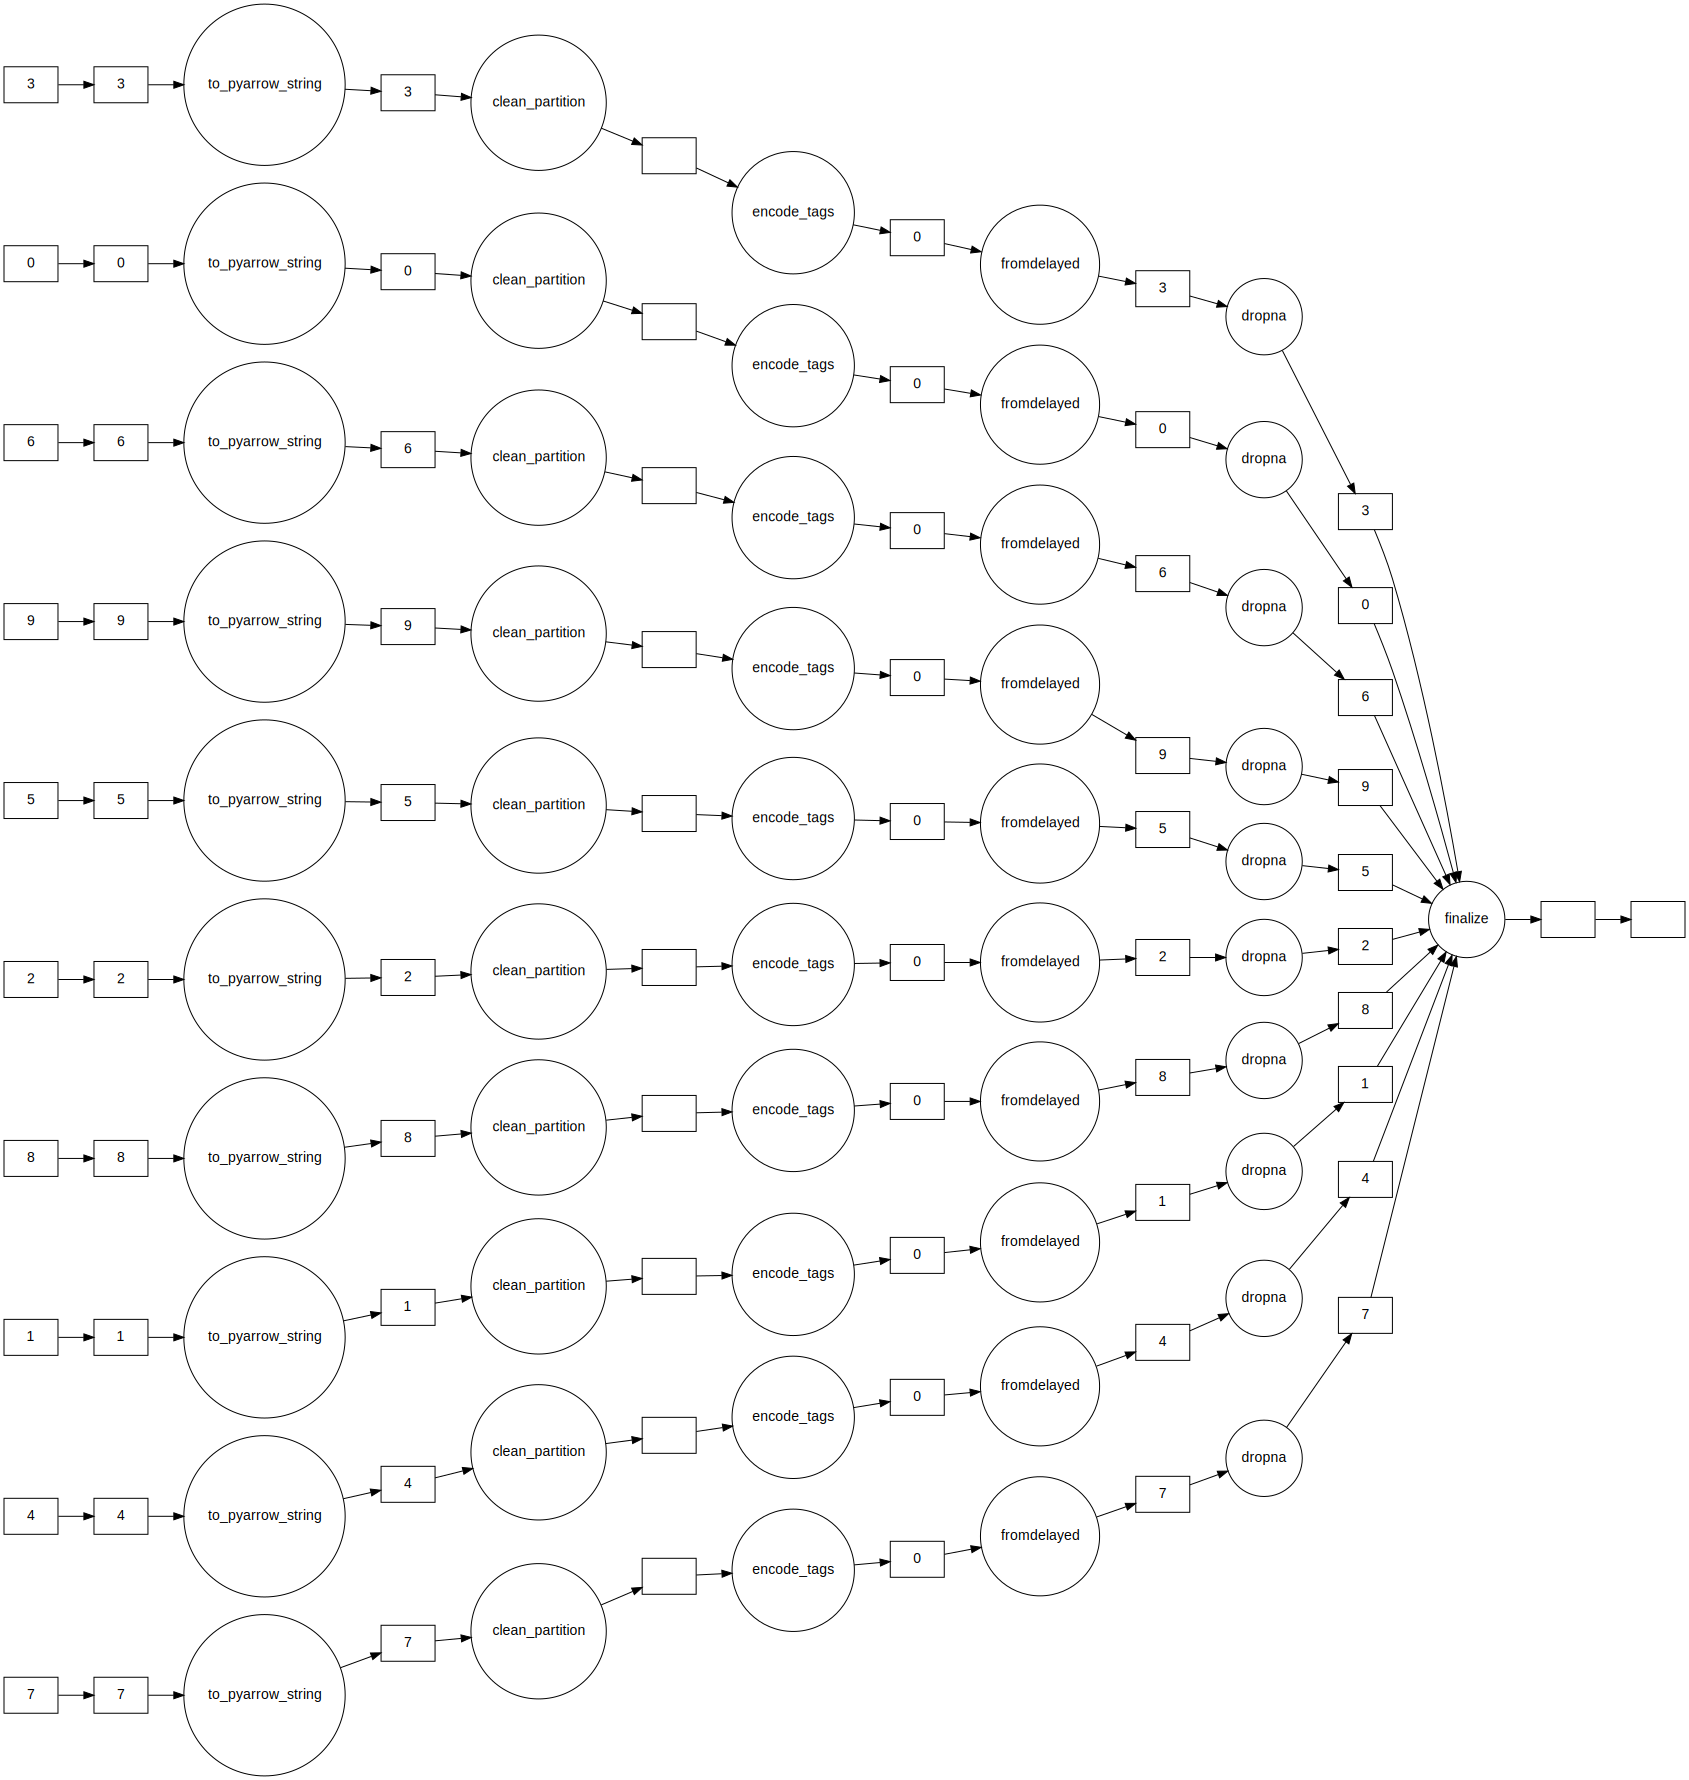

In [50]:
df_23, all_tags_23 = process_attributes(df_23)

full_pipeline = dask.delayed(df_23)
full_pipeline.visualize(rankdir="LR", filename='images/data_preprocessing_task.svg')

In [51]:
df_23.compute()

/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

,Book ID,Author ID,Author,Novel Title,Novel Intro,Tags,Summary,Motivation,Characters,IP,...,第四天灾,未来架空,克苏鲁,鬼灭,日久生情,多重人格,男配,秦穿,国风幻想,猎人
0,4780791,2383960,时有幸,网恋到顶头上司了！,【全文完，感谢喜欢~新文先婚后爱《假结婚还要接吻》已开】傲慢到真香的野心家X甜软又上进的黏人...,"情有独钟,天作之合,天之骄子,业界精英,甜文,轻松",一颗心被另一颗心点燃,网上交友需要擦亮眼睛,"纪弥,贺景延",,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7845710,4150375,初云秀儿,嫁了一个老皇帝,市井话本中，每当有一个“相府小姐”和“状元郎”终成眷属，就有一个牵线丫鬟和状元郎小厮配成一对...,"宫廷侯爵,穿越时空,励志,爽文,正剧",不求一丝真情，但求荣华富贵,坚定内心，心怀光明，心在，自由就在。 ...,"袭红蕊,林绾,宁澜,崇文帝",,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8150618,991698,白沙塘,用漫画看贝克街221B好邻居,【简易文案如题，第一人称为主视角】何学死了，又活在了现代摩登的英国伦敦。他的手机载进了同步漫...,"英美衍生,天之骄子,业界精英,悬疑推理,成长,轻松",【正文完】贝克街221B好邻居,我最后的敬意，要献给那些知道我不完美却依旧爱我的人——泰戈尔 ...,"何学，兰尼,夏洛克,华生,莫里亚蒂",,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6119072,4012128,既弥,再溺,【同类型《你梦见我》已开，vb@弥弥卷】那场绑架案中，姜执宜清醒的最后一秒，看到的是周栩应的...,"破镜重圆,天之骄子,轻松,HE,救赎",我愿为你再沉溺一万次,好好学习,"姜执宜,周栩应",,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8242109,821775,闲时听雨,路人她过分强大,星网上正进行一场直播。几名军事学院的优秀学员，在沙漠中艰难求生。 简陋的装备，恶劣的环境，...,"穿越时空,星际,系统,爽文,轻松,天选之子",你们管这叫路人？,即便身处困境，也不放弃希望。 ...,"宋春时,唐十二",,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7314377,1742981,蓬莱客,千山青黛,一个寻常的春日傍晚，紫陌花重，天色将昏，在金吾卫催人闭户的隆隆暮鼓声里，画师叶絮雨踏入了京洛...,"情有独钟,因缘邂逅,正剧",宫廷画师&金吾卫,追寻真善美。,"叶絮雨,裴萧元,宇文峙,阿史那承平,李延","电视剧签约,网络剧签约,亚洲出版签约",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,8248655,2643709,眼镜腿儿,扬汤止沸,周琎刚对陆靖文动了一点心，便发现他毫无由来的厌恶，于是决定礼尚往来。可这一切不过扬汤止沸，聊...,"花季雨季,成长,校园",傲慢与偏见,自强不息，终有蜕变。,"周琎,陆靖文,官倩倩,陈曙天,容舒",中国大陆出版最新签约,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,7154127,3667289,苏其,折纸星星,本文文案：高一时不知怎么流行起折纸星星，把喜欢一点一点折成星星，折1314个，再送给心仪的男...,"豪门世家,青梅竹马,婚恋,甜文,轻松",青梅竹马的双向暗恋,你是唯一,"姜墨,贺星沉,预收《第七根肋骨》",,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,7320151,3603712,戴山青,寒门贵女,祝萱投胎技术寻常，出身乡野，家有薄田几亩猪羊数只。上有兄姐下有弟妹，家里吃饭的嘴三年添两张。...,"宫廷侯爵,天之骄子,穿越时空,成长,正剧",燕雀的鸿鹄之志,自立为贵,"祝萱（祝翾）,??,凌太月,祝莲,祝英,元奉壹,祝葵,沈云",,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Clean Text Data - Novel Intro

Here, I use novel intro as the text data I plan to clean and explore. I can also use the text from all free chapters of each novel, which is stored in the Chapters column. I choose novel intro as it represents what the author thinks are important and eye-catching elements(and for relatively successful novels as the collected samples are the top 1,000 successful novels).

#### Remove Punctuation

In [ ]:
# df_23['Novel Intro'] = df_23['Novel Intro'].map(lambda x: remove_chinese_punctuation(x, punc))

#### Add Character Names to Dictioanry

I want to add character names in Jieba's dictionary. This will help Jieba perform better at tokenization, correctly recognizing protagonist names, which I assume occurs frequently throughout text.

In [19]:
@dask.delayed(name="get_names")
def get_names_from_partition(partition):
    names = set()
    for lst in partition['Characters'].dropna().str.split(','):
        for name in lst:
            names.add(name.strip())
    return list(names)

@dask.delayed(name="add_to_jieba")
def add_words_to_jieba(names):
    for name in names:
        jieba.add_word(name, freq=50000, tag='nz')
    return True

def process_character_names(dask_df):
    """
    Extract character names from a Dask DataFrame and add them to jieba dictionary.
    """
    # Extract names from each partition
    name_lists = [get_names_from_partition(part) for part in dask_df.to_delayed()]
    
    # Flatten and deduplicate the names
    all_names = delayed(lambda *lists: list(set(name for sublist in lists for name in sublist)))(*name_lists)
    
    # Add them to jieba
    add_job = add_words_to_jieba(all_names)

    add_job.visualize(rankdir="LR", filename='images/character_name_task.svg')

    # Trigger computation
    return add_job.compute()


In [20]:
process_character_names(df_23)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/jieba.cache
Loading model cost 0.351 seconds.
Prefix dict has been built successfully.


True

#### Tokenize with Customized Stopword Set for Each Novel

In [21]:
def get_chinese_stopwords(characters, title):
    chars = [c.strip() for c in characters.split(",")] if characters else []
    return set(chars + [title]).union(custom_stopwords)

# Jieba tokenization + cutomized stopwords removal
def jieba_tokenize_and_filter(text, stopwords):
    if pd.isnull(text):
        return []
    tokens = list(jieba.cut(text, cut_all=False))
    tokens_lst = [t for t in tokens if t not in stopwords and t.strip()]
    return tokens_lst

def process_row(row):
    stopwords = get_chinese_stopwords(row['Characters'], row['Novel Title'])
    return jieba_tokenize_and_filter(row['Novel Intro'], stopwords)


In [22]:
@dask.delayed(name="clean_punctuation")
def clean_punctuation(df, punc):
    df['Novel Intro'] = df['Novel Intro'].map(lambda x: remove_chinese_punctuation(x, punc))
    return df

@dask.delayed(name="tokenize_intro")
def tokenize_intro(df):
    def process_row(row):
        stopwords = get_chinese_stopwords(row['Characters'], row['Novel Title'])
        return jieba_tokenize_and_filter(row['Novel Intro'], stopwords)
    df['cleaned_intro'] = df.apply(process_row, axis=1)
    return df

In [23]:
def process_intro(df):
    delayed_parts = [tokenize_intro(clean_punctuation(part, punc)) for part in df.to_delayed()]
    df_cleaned = dd.from_delayed(delayed_parts)
    return df_cleaned

In [24]:
df_23 = process_intro(df_23)

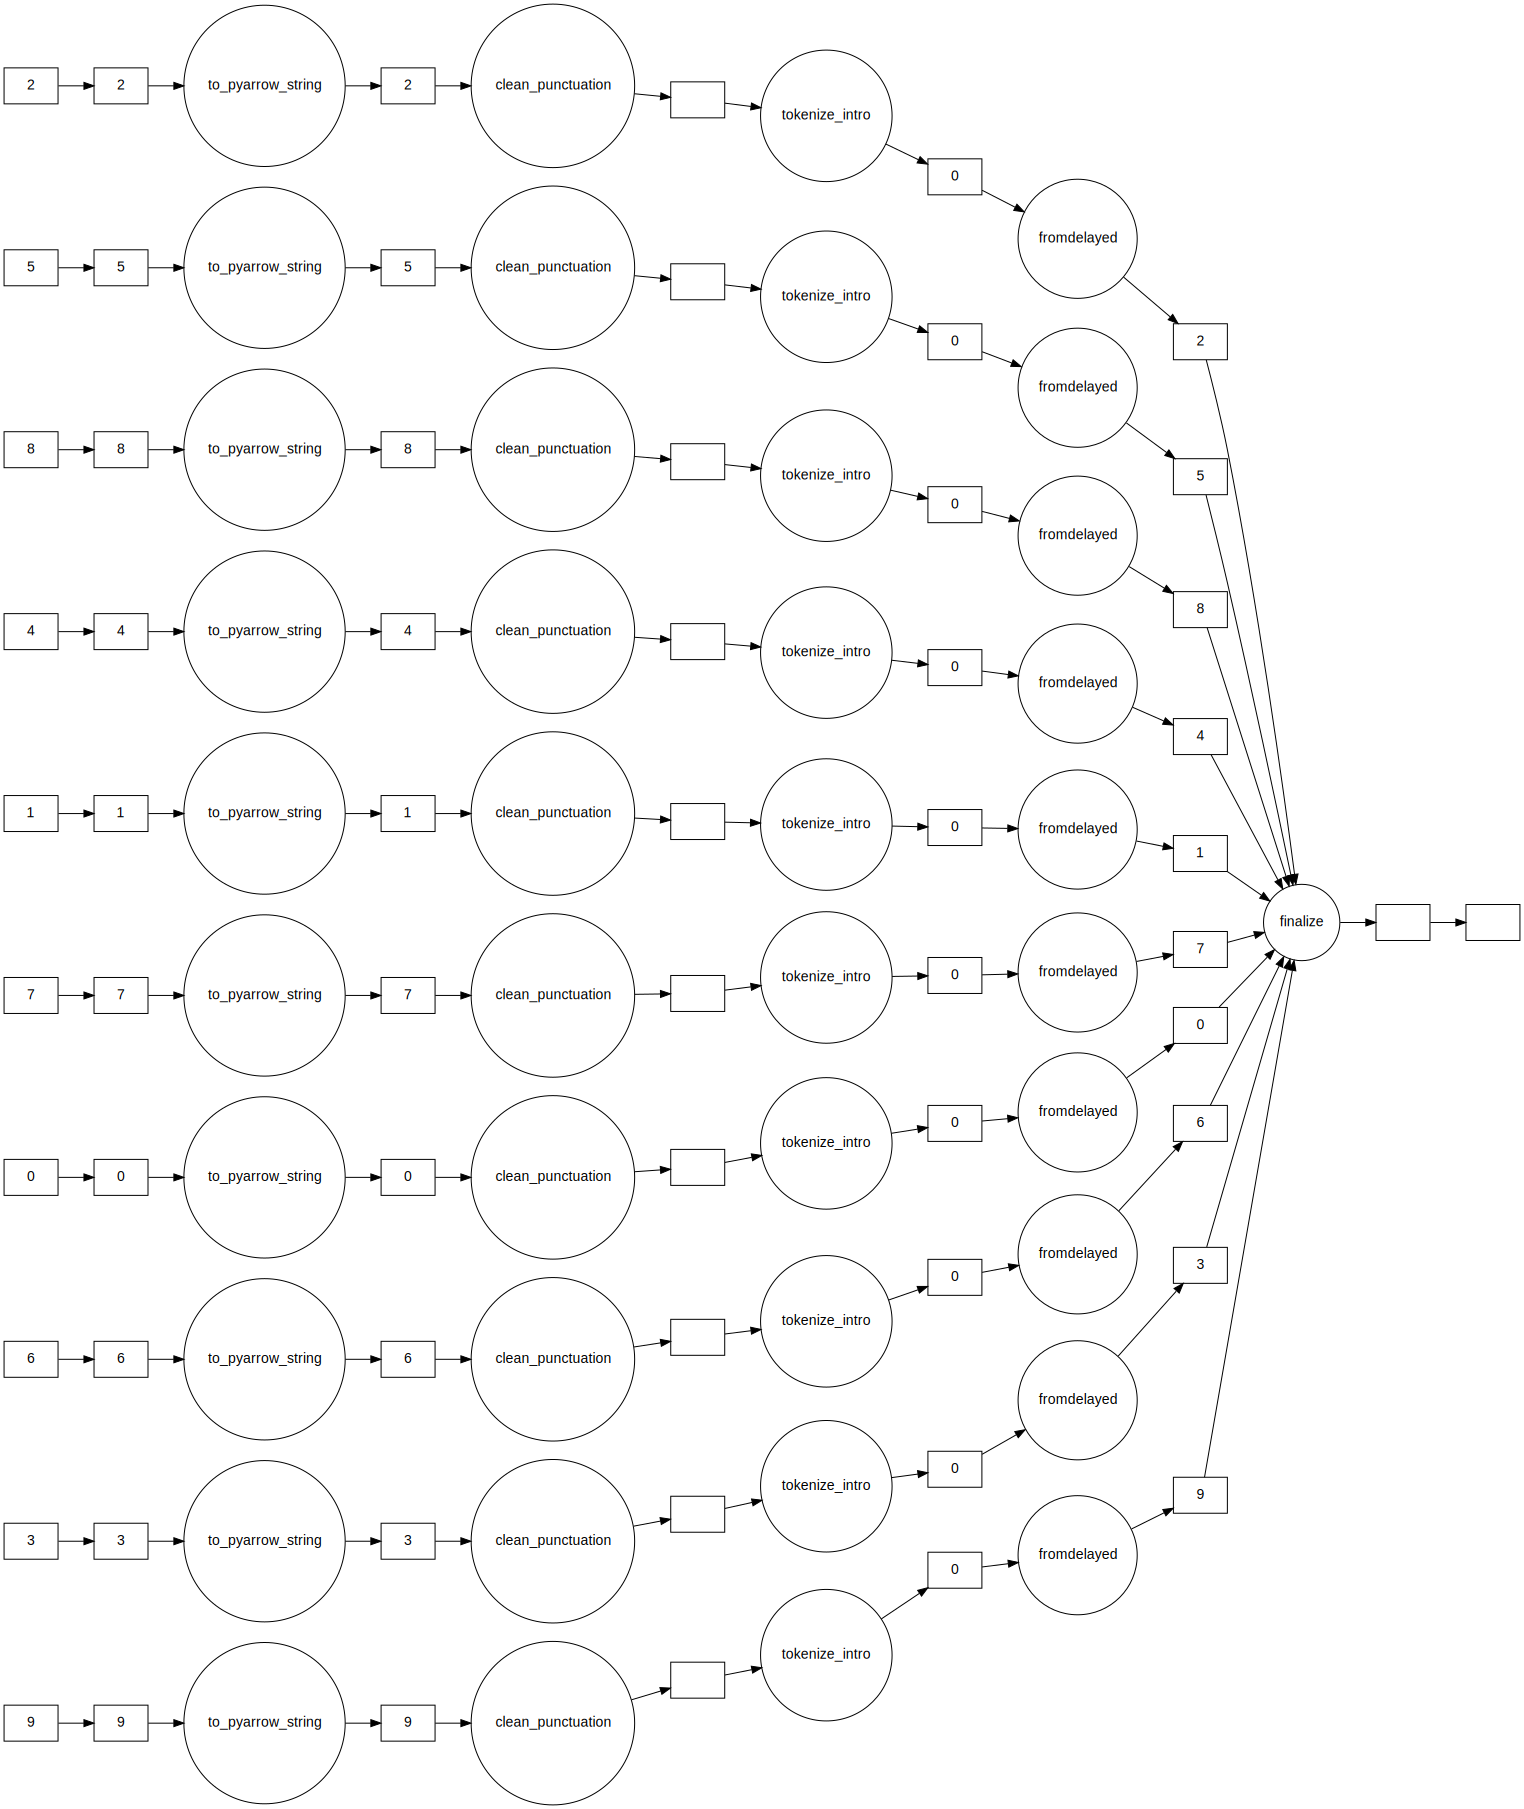

In [25]:
full_pipeline = dask.delayed(df_23)
full_pipeline.visualize(rankdir="LR", filename='images/text_preprocessing_task.svg')

In [26]:
df_23.compute()

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/jieba.cache
Building prefix dict from the default dictionary ...
Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/jieba.cache
Loading model from cache /var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/jieba.cache
Loading model cost 0.442 seconds.
Prefix dict has been built successfully.
Loading model cost 0.438 seconds.
Prefix dict has been built successfully.
Loading model cost 0.451 seconds.
Prefix dict has been built successfully.


,Book ID,Author ID,Author,Novel Title,Novel Intro,Tags,Summary,Motivation,Characters,IP,Awards,Genre,Perspective,Update Status,Word Count,Contract Status,Review Count,Subscription Count,Chapters,cleaned_intro
0,4780791,2383960,时有幸,网恋到顶头上司了！,全文完 感谢喜欢 新文先婚后爱 假结婚还要接吻 已开 傲慢到真香的野心家 甜软又上进的黏人...,"情有独钟,天作之合,天之骄子,业界精英,甜文,轻松",一句话简介：一颗心被另一颗心点燃,立意：网...,"纪弥,贺景延",,征文活动优秀作品奖章 新文孵化季-现代都市纯爱征文活动二等奖 (作品在征文活动被评为优...,原创-纯爱-近代现代-爱情,主受,完结,588029字,已签约,51654,123460,晋江文学城独家正版文/时有幸周五，早晨八点五十分。[咱们新老大的秘书室今早正式搬过来，有人到...,"[全文完, 先婚后爱, 假结婚, 接吻, 傲慢, 真香, 野心家, 甜软, 上进, 黏人, ..."
0,7845710,4150375,初云秀儿,嫁了一个老皇帝,市井话本中 每当有一个 相府小姐 和 状元郎 终成眷属 就有一个牵线丫鬟和状元郎小厮配成一对...,"宫廷侯爵,穿越时空,励志,爽文,正剧",一句话简介：不求一丝真情，但求荣华富贵,立意：坚...,"袭红蕊,林绾,宁澜,崇文帝",,征文活动优秀作品奖章 古代组主题征文“女配觉醒时” 优秀作品 (作品在征文活动被评为优秀...,原创-言情-架空历史-剧情,女主,完结,627280字,已签约,43873,96381,【但见那丫头一袭贴身水红长裙，外罩一层浅绿褙子，行动起来如烟似柳，顾盼多情，眼波一转，就显出...,"[市井, 话本, 相府, 小姐, 状元郎, 终成眷属, 牵线, 丫鬟, 状元郎, 小厮, 配..."
0,8150618,991698,白沙塘,用漫画看贝克街221B好邻居,简易文案如题 第一人称为主视角 何学死了 又活在了现代摩登的英国伦敦 他的手机载进了同步漫...,"英美衍生,天之骄子,业界精英,悬疑推理,成长,轻松",一句话简介：【正文完】贝克街221B好邻居,立意：我...,"何学，兰尼,夏洛克,华生,莫里亚蒂",,征文活动优秀作品奖章 热血少年 征文活动优秀作品 (作品在征文活动被评为优秀作品将获得此...,衍生-无CP-近代现代-西方衍生,男主,完结,1994004字,已签约,160303,87436,1．「我很介意，谢谢了！」根据航空数据OAG的统计，发生空难的概率相当于命中博/彩机头等奖的...,"[简易, 如题, 第一人称, 为主, 视角, 何学, 活, 现代, 摩登, 英国伦敦, 手机..."
0,6119072,4012128,既弥,再溺,同类型 你梦见我 已开 b 弥弥卷 那场绑架案中 姜执宜清醒的最后一秒 看到的是周栩应的脸...,"破镜重圆,天之骄子,轻松,HE,救赎",一句话简介：我愿为你再沉溺一万次,立意：好...,"姜执宜,周栩应",,vip强推奖章 因为原生家庭的原因姜执宜一直生长在淤泥里，虽然生活很难但她一直抱着希望，坚...,原创-言情-近代现代-爱情,女主,完结,305896字,已签约,3131,54180,《再溺》2023.02.03文/既弥雨声很大，空气潮湿黏腻。水痕在玻璃窗上紧贴着往下掉，雾气...,"[类型, 梦见, b, 弥弥卷, 那场, 绑架案, 清醒, 一秒, 分开, 夜雨, 很大, ..."
0,8242109,821775,闲时听雨,路人她过分强大,星网上正进行一场直播 几名军事学院的优秀学员 在沙漠中艰难求生 简陋的装备 恶劣的环境 ...,"穿越时空,星际,系统,爽文,轻松,天选之子",一句话简介：你们管这叫路人？,立意：即...,"宋春时,唐十二",,vip强推奖章 宋春时穿越到星际，意外绑定古武系统，为了顺利回家，不得不踏上好好练功，天天...,原创-言情-幻想未来-剧情,女主,完结,383632字,已签约,12707,96819,001夜晚的荒星幽暗诡谲，不知名的动物在远处凄厉哀嚎。岩洞内，宋春时被吵醒，仅掀了掀眼皮，又...,"[星, 网上, 正, 进行, 一场, 直播, 几名, 军事学院, 优秀, 学员, 沙漠, 艰..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,7314377,1742981,蓬莱客,千山青黛,一个寻常的春日傍晚 紫陌花重 天色将昏 在金吾卫催人闭户的隆隆暮鼓声里 画师叶絮雨踏入了京洛...,"情有独钟,因缘邂逅,正剧",一句话简介：宫廷画师&金吾卫,立意：追...,"叶絮雨,裴萧元,宇文峙,阿史那承平,李延","电视剧签约,网络剧签约,亚洲出版签约",vip强推奖章 定王府郡主李嫮儿五岁时遭逢国乱，流离失所，被当世著名画师叶钟离收养，改名叶...,原创-言情-架空历史-爱情,女主,完结,877440字,已签约,40149,113536,时节已转初春，但随夕阳西沉，暮寒依旧如刀。野外官道尽头处，渐渐出现一队人马的影。数骑护着辆马...,"[寻常, 春日, 傍晚, 紫, 陌花重, 天色, 昏, 金吾卫, 催人, 闭户, 隆隆, 暮..."
0,8248655,2643709,眼镜腿儿,扬汤止沸,周琎刚对陆靖文动了一点心 便发现他毫无由来的厌恶 于是决定礼尚往来 可这一切不过扬汤止沸 聊...,"花季雨季,成长,校园",一句话简介：傲慢与偏见,立意：自...,"周琎,陆靖文,官倩倩,陈曙天,容舒",中国大陆出版最新签约,年中/年终盘点奖章 2024年 现言组年度盘点优秀作品 (在年中/年终盘点活动中入选的作...,原创-言情-近代现代-剧情,不明,完结,158507字,已签约,11687,53989,铃声响的时候，天还蒙蒙亮，周琎挣扎着按掉闹钟，眉头下意识皱着，眼睛怎么都睁不开，只好耷拉着眼...,"[周, 琎, 刚, 陆靖, 文动, 一点, 心, 毫无, 由来, 厌恶, 决定, 礼尚往来,..."
0,7154127,3667289,苏其,折纸星星,本文文案 高一时不知怎么流行起折纸星星 把喜欢一点一点折成星星 折1314个 再送给心仪的男...,"豪门世家,青梅竹马,婚恋,甜文,轻松",一句话简介：青梅竹马的双向暗恋,立意：你...,"姜墨,贺星沉,预收《第七根肋骨》",,vip强推奖章 男主贺星沉与女主姜墨从小一起长大一起学习在各自最阴暗失落的时间里互相帮助，...,原创-言情-近代现代-爱情,女主,完结,389090字,已签约,2323,45662,《星星对我说》文/苏其2023.01.05晋江文学城首发“晚风中闪过，几帧从前啊远光中走来，...,"[高, 一时, 不知, 流行, 折纸, 星星, 一点一点, 折, 星星, 折, 1314, ..."
0,7320151,3603712,戴山青,寒门贵女,祝萱投胎技术寻常 出身乡野 家有薄田几亩猪羊数只 上有兄姐下有弟妹 家里吃饭的嘴三年添两张 ...,"宫廷侯爵,天之骄子,穿越时空,成长,正剧",一句话简介：燕雀的鸿鹄之志,立意：自...,"祝萱（祝翾）,??,凌太月,祝莲,祝英,元奉壹,祝葵,沈云",,vip强推奖章 作为土著女的祝萱，因为穿越者的蝴蝶效应，在六岁的时候得以去蒙学启蒙，念了书...,原创-言情-架空历史-剧情,女主,连载,1958079字,已签约,55506,80308,大越元新三年，百废待兴。正是七月下旬，热气散尽，芦苇乡已露出几分秋意。祝萱的生日在七月三十，...,"[祝萱, 投胎, 技术, 寻常, 出身, 乡野, 家有, 薄田, 几亩, 猪羊, 数只, 兄..."


## Exploratory Data Analysis

### Analysis on Novel Intro

#### TFIDF with Jieba's builtin function

In [27]:
import jieba.analyse

In [28]:
novel_intro_str = ', '.join(df_23['Novel Intro'])

In [29]:
jieba.analyse.extract_tags(novel_intro_str, topK=30, withWeight=True)

[('女主', 0.0339276492387676),
 ('男主', 0.03156322235597738),
 ('文案', 0.02136345423402337),
 ('预收', 0.020998692953459283),
 ('自己', 0.019288929048998725),
 ('一个', 0.018575276238872458),
 ('反派', 0.017621982112882767),
 ('男人', 0.01502936228468088),
 ('世界', 0.014438045747283525),
 ('主角', 0.01437680939568831),
 ('系统', 0.011538777527143477),
 ('喜欢', 0.01152927766437768),
 ('剧情', 0.011188810141775132),
 ('游戏', 0.011171567060895855),
 ('大佬', 0.010954296973818306),
 ('直到', 0.010945042426673823),
 ('完结', 0.010583706805911707),
 ('知道', 0.010068330513477369),
 ('后来', 0.009779432665718322),
 ('他们', 0.009708769203537361),
 ('什么', 0.009439804365856392),
 ('看着', 0.009253827214518512),
 ('不是', 0.009220688721007805),
 ('本文', 0.009192134198277923),
 ('炮灰', 0.009067921599523129),
 ('没有', 0.009010100419635894),
 ('收藏', 0.008781849940202615),
 ('穿越', 0.008718952645576736),
 ('就是', 0.008630189676183266),
 ('重生', 0.008538985449826706)]

But, I decided to construct a custom TF-IDF process as Jieba's own idf does not correctly reflect common words in online novels.

#### Customize TFIDF

In [30]:
def compute_tfidf_top_words(df, column = "cleaned_intro", top_k=30):
    # Explode tokens
    df_words = df[[column]].explode(column).dropna()

    # TF: word counts across all intros
    tf = df_words.groupby(column, observed=False).size().rename('tf')

    # DF: number of documents each word appears in
    doc_tokens = df[column].map(lambda toks: set(toks), meta=(column, 'object'))
    df_doc_words = dd.from_pandas(
        doc_tokens.compute().explode().dropna().reset_index().rename(columns={'index': 'doc_id', 0: column}),
        npartitions=1
    )
    df_count = df_doc_words.groupby(column, observed=False).doc_id.nunique().rename('df')

    # Total documents
    N = len(df)

    # Merge TF and DF, compute TF-IDF
    tfidf_df = tf.to_frame().join(df_count, how='inner')
    tfidf_df['idf'] = np.log(N / (1 + tfidf_df['df']))
    tfidf_df['tfidf'] = tfidf_df['tf'] * tfidf_df['idf']

    return tfidf_df.sort_values('tfidf', ascending=False).head(top_k)


I run the following code to perform my customized tf-idf procedure on data from 2003 to 2024.

In [55]:
year_results = {}

for year in range(2003, 2025):
    jieba.initialize()
    jieba.load_userdict("online-novel-jjwxc-dict.txt")
    df = load_dask_df(year) 
    process_character_names(df)
    df = process_intro(df)
    df = df.reset_index(drop=True)
    top_words = compute_tfidf_top_words(df, column = 'cleaned_intro', top_k=300)
    year_results[year] = top_words


We can take a look at the top 100 tokens from 2023

In [56]:
year_results[2023]

,tf,df,idf,tfidf
cleaned_intro,,,,
男人,805,97,2.322788,1869.844179
系统,735,94,2.353878,1730.100615
游戏,468,77,2.551046,1193.889740
反派,382,80,2.513306,960.082939
剧情,390,89,2.407946,939.098787
...,...,...,...,...
面对,108,61,2.780621,300.307057
掉,111,66,2.703063,300.039955
是不是,104,55,2.882404,299.769973


#### Visualization & Analysis

I want to analyze how popularity of tokens shift across the 21 years. 

In [57]:
# Step 1: Combine all yearly TF-IDF DataFrames
all_years_df = pd.concat(year_results.values(), keys=year_results.keys(), names=['year', 'token']).reset_index()
all_years_df

,year,token,tf,df,idf,tfidf
0,2003,爱情,61,35,2.922265,178.258172
1,2003,男人,55,26,3.209947,176.547096
2,2003,莫悠,30,1,5.812637,174.379106
3,2003,々,27,1,5.812637,156.941196
4,2003,小孩,28,2,5.407172,151.400810
...,...,...,...,...,...,...
6595,2024,机会,112,64,2.728355,305.575812
6596,2024,公子,100,46,3.052595,305.259514
6597,2024,直,97,42,3.141543,304.729634
6598,2024,再次,111,63,2.743860,304.568422


In [58]:
# Step 2: Get top 20 tokens by max TF-IDF across all years
top_tokens = (
    all_years_df.groupby('token', observed=False)['tfidf']
    .max()
    .sort_values(ascending=False)
    .head(20)
    .index
)

In [59]:
top_tokens

Index(['男人', '系统', '游戏', '剧情', '反派', '大佬', '穿越', '少年', '玩家', '重生', '太子', '哥哥',
       '人类', '老婆', '恋爱', '任务', '豪门', '温柔', '崽', '漂亮'],
      dtype='object', name='token')

In [60]:
# Step 3: Filter to keep only top tokens
filtered_df = all_years_df[all_years_df['token'].isin(top_tokens)]

In [61]:
pivot_df = filtered_df.pivot(index='year', columns='token', values='tfidf')
pivot_df

token,人类,任务,剧情,反派,哥哥,大佬,太子,少年,崽,恋爱,温柔,游戏,漂亮,玩家,男人,穿越,系统,老婆,豪门,重生
year,,,,,,,,,,,,,,,,,,,,
2003,60.319833,NaN,NaN,NaN,41.038865,NaN,NaN,81.201261,NaN,45.186777,73.451414,47.394154,NaN,NaN,176.547096,47.140246,NaN,NaN,NaN,NaN
2004,60.630267,NaN,NaN,NaN,89.264503,NaN,NaN,131.884459,NaN,NaN,103.168760,NaN,NaN,NaN,181.352111,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,68.815067,NaN,NaN,NaN,NaN,144.881149,NaN,NaN,114.322955,140.137815,NaN,NaN,235.956513,272.155267,NaN,NaN,NaN,NaN
2006,94.784556,NaN,71.155305,NaN,108.825760,NaN,NaN,164.145572,NaN,NaN,100.077482,163.238640,NaN,NaN,188.677833,586.034879,NaN,NaN,NaN,NaN
2007,NaN,NaN,147.841914,NaN,NaN,NaN,NaN,155.515421,NaN,NaN,115.716443,107.357861,NaN,NaN,226.359725,552.039079,NaN,NaN,NaN,84.858725
2008,NaN,NaN,270.797754,NaN,NaN,NaN,NaN,197.773689,NaN,NaN,119.127242,128.492209,NaN,NaN,261.758859,658.758193,NaN,NaN,NaN,106.153723
2009,NaN,NaN,296.490896,NaN,97.775563,NaN,NaN,214.473016,NaN,NaN,154.845849,132.540640,NaN,NaN,275.094646,604.925073,NaN,NaN,NaN,213.943242
2010,125.852374,NaN,306.334277,NaN,103.304051,NaN,NaN,152.110562,NaN,NaN,136.329728,173.385801,NaN,NaN,272.904674,711.645383,NaN,NaN,NaN,351.092566
2011,120.340963,NaN,304.204104,NaN,175.770222,NaN,146.420034,197.528709,NaN,NaN,170.261482,199.530770,NaN,NaN,318.224950,756.823664,136.386425,NaN,NaN,524.484789


In [62]:
lookup_dict = all_years_df.set_index(['year', 'token'])['tfidf'].to_dict()

In [63]:
for year in pivot_df.index:
    for token in pivot_df.columns:
        if pd.isna(pivot_df.at[year, token]):
            pivot_df.at[year, token] = lookup_dict.get((year, token), np.nan)

In [64]:
pivot_df

token,人类,任务,剧情,反派,哥哥,大佬,太子,少年,崽,恋爱,温柔,游戏,漂亮,玩家,男人,穿越,系统,老婆,豪门,重生
year,,,,,,,,,,,,,,,,,,,,
2003,60.319833,NaN,NaN,NaN,41.038865,NaN,NaN,81.201261,NaN,45.186777,73.451414,47.394154,NaN,NaN,176.547096,47.140246,NaN,NaN,NaN,NaN
2004,60.630267,NaN,NaN,NaN,89.264503,NaN,NaN,131.884459,NaN,NaN,103.168760,NaN,NaN,NaN,181.352111,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,68.815067,NaN,NaN,NaN,NaN,144.881149,NaN,NaN,114.322955,140.137815,NaN,NaN,235.956513,272.155267,NaN,NaN,NaN,NaN
2006,94.784556,NaN,71.155305,NaN,108.825760,NaN,NaN,164.145572,NaN,NaN,100.077482,163.238640,NaN,NaN,188.677833,586.034879,NaN,NaN,NaN,NaN
2007,NaN,NaN,147.841914,NaN,NaN,NaN,NaN,155.515421,NaN,NaN,115.716443,107.357861,NaN,NaN,226.359725,552.039079,NaN,NaN,NaN,84.858725
2008,NaN,NaN,270.797754,NaN,NaN,NaN,NaN,197.773689,NaN,NaN,119.127242,128.492209,NaN,NaN,261.758859,658.758193,NaN,NaN,NaN,106.153723
2009,NaN,NaN,296.490896,NaN,97.775563,NaN,NaN,214.473016,NaN,NaN,154.845849,132.540640,NaN,NaN,275.094646,604.925073,NaN,NaN,NaN,213.943242
2010,125.852374,NaN,306.334277,NaN,103.304051,NaN,NaN,152.110562,NaN,NaN,136.329728,173.385801,NaN,NaN,272.904674,711.645383,NaN,NaN,NaN,351.092566
2011,120.340963,NaN,304.204104,NaN,175.770222,NaN,146.420034,197.528709,NaN,NaN,170.261482,199.530770,NaN,NaN,318.224950,756.823664,136.386425,NaN,NaN,524.484789


In [65]:
pivot_df = pivot_df.fillna(0)

In [66]:
pivot_df

token,人类,任务,剧情,反派,哥哥,大佬,太子,少年,崽,恋爱,温柔,游戏,漂亮,玩家,男人,穿越,系统,老婆,豪门,重生
year,,,,,,,,,,,,,,,,,,,,
2003,60.319833,0.000000,0.000000,0.000000,41.038865,0.000000,0.000000,81.201261,0.000000,45.186777,73.451414,47.394154,0.000000,0.000000,176.547096,47.140246,0.000000,0.000000,0.000000,0.000000
2004,60.630267,0.000000,0.000000,0.000000,89.264503,0.000000,0.000000,131.884459,0.000000,0.000000,103.168760,0.000000,0.000000,0.000000,181.352111,0.000000,0.000000,0.000000,0.000000,0.000000
2005,0.000000,0.000000,68.815067,0.000000,0.000000,0.000000,0.000000,144.881149,0.000000,0.000000,114.322955,140.137815,0.000000,0.000000,235.956513,272.155267,0.000000,0.000000,0.000000,0.000000
2006,94.784556,0.000000,71.155305,0.000000,108.825760,0.000000,0.000000,164.145572,0.000000,0.000000,100.077482,163.238640,0.000000,0.000000,188.677833,586.034879,0.000000,0.000000,0.000000,0.000000
2007,0.000000,0.000000,147.841914,0.000000,0.000000,0.000000,0.000000,155.515421,0.000000,0.000000,115.716443,107.357861,0.000000,0.000000,226.359725,552.039079,0.000000,0.000000,0.000000,84.858725
2008,0.000000,0.000000,270.797754,0.000000,0.000000,0.000000,0.000000,197.773689,0.000000,0.000000,119.127242,128.492209,0.000000,0.000000,261.758859,658.758193,0.000000,0.000000,0.000000,106.153723
2009,0.000000,0.000000,296.490896,0.000000,97.775563,0.000000,0.000000,214.473016,0.000000,0.000000,154.845849,132.540640,0.000000,0.000000,275.094646,604.925073,0.000000,0.000000,0.000000,213.943242
2010,125.852374,0.000000,306.334277,0.000000,103.304051,0.000000,0.000000,152.110562,0.000000,0.000000,136.329728,173.385801,0.000000,0.000000,272.904674,711.645383,0.000000,0.000000,0.000000,351.092566
2011,120.340963,0.000000,304.204104,0.000000,175.770222,0.000000,146.420034,197.528709,0.000000,0.000000,170.261482,199.530770,0.000000,0.000000,318.224950,756.823664,136.386425,0.000000,0.000000,524.484789


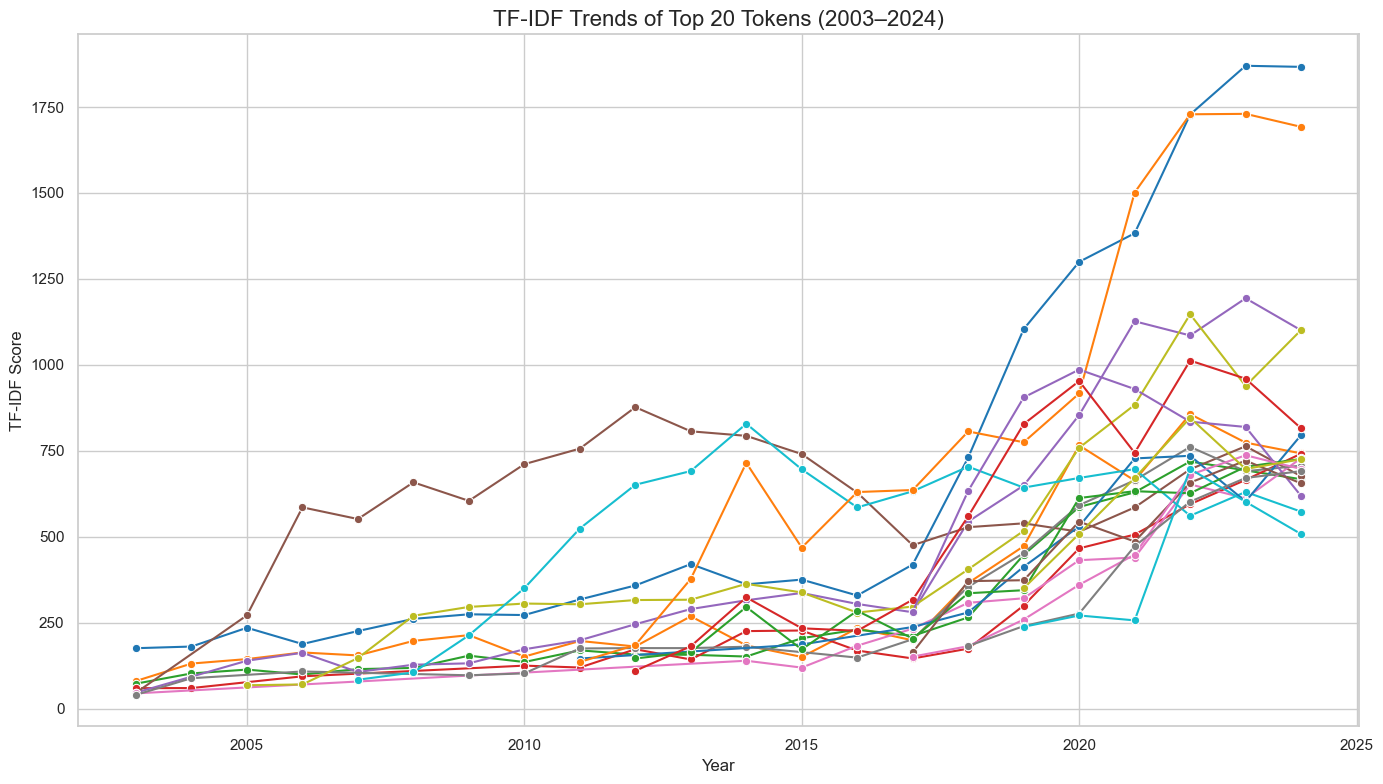

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

sns.lineplot(
    data=filtered_df,
    x="year",
    y="tfidf",
    hue="token",
    marker="o",
    palette="tab10",
    legend=False
)

plt.title("TF-IDF Trends of Top 20 Tokens (2003–2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("TF-IDF Score", fontsize=12)
plt.tight_layout()
plt.savefig('images/top_20_tokens_trend.png')
plt.show()

I also plotted an interactive plot

In [68]:
# Bokeh
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, show
from bokeh.palettes import Category20_20
from bokeh.io import output_file
from bokeh.models import Legend, LegendItem

In [69]:
output_file("novel_intro_tfidf_trend.html")

source = ColumnDataSource(data={'year': pivot_df.index})
for i, token in enumerate(pivot_df.columns):
    source.data[token] = pivot_df[token].values

p = figure(
    width=1000,
    height=600,
    title="TF-IDF Trend（2003–2024）",
    x_axis_label='Year',
    y_axis_label='TF-IDF',
    tools="pan,wheel_zoom,box_zoom,reset,save,hover",
    tooltips=[("Token", "$name"), ("Year", "@year"), ("TF-IDF", "@$name")],
)

# Step 4: Add lines for each token
colors = Category20_20
for i, token in enumerate(pivot_df.columns):
    p.line(
        x='year',
        y=token,
        source=source,
        name=token,
        line_width=2,
        color=colors[i % len(colors)]
    )

legend_items = []

for i, token in enumerate(pivot_df.columns):
    line = p.line(
        x='year',
        y=token,
        source=source,
        name=token,
        line_width=2,
        color=colors[i % len(colors)]
    )
    legend_items.append(LegendItem(label=token, renderers=[line]))

legend = Legend(items=legend_items, location="center")
p.add_layout(legend, 'right')
p.legend.ncols = 4
legend.click_policy = "hide"

show(p)

### Predicting Success

Next, I want to explore to what extent success is correlated with attributes of the novel. Ans I want to see what attributes make a novel popular for different years.

In [52]:
# Machine Learning Packages
from dask_ml.preprocessing import Categorizer, DummyEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
categories_col = ["Perspective", "Update Status", "Originality", "Romance", \
                "Setting", "Theme", "Contract Status"]

In [54]:
features_col = categories_col + all_tags_23

In [55]:
features_df = df_23[features_col]

In [56]:
features_df.head()

/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior


,Perspective,Update Status,Originality,Romance,Setting,Theme,Contract Status,天之骄子,爽文,英美衍生,...,第四天灾,未来架空,克苏鲁,鬼灭,日久生情,多重人格,男配,秦穿,国风幻想,猎人
0,主受,完结,原创,纯爱,近代现代,爱情,已签约,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,女主,完结,原创,言情,架空历史,剧情,已签约,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,男主,完结,衍生,无CP,近代现代,西方衍生,已签约,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,女主,完结,原创,言情,近代现代,爱情,已签约,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,女主,完结,原创,言情,幻想未来,剧情,已签约,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features_df.dtypes

Perspective      object
Update Status    object
Originality      object
Romance          object
Setting          object
                  ...  
多重人格              int64
男配                int64
秦穿                int64
国风幻想              int64
猎人                int64
Length: 225, dtype: object

In [58]:
target_df = df_23["Subscription Count"]

In [59]:
target_df.describe().compute()

/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

count    999.000000
mean      11.245652
std        0.477745
min       10.660853
25%       10.895303
50%       11.195966
75%       11.714403
max       13.216504
Name: Subscription Count, dtype: float64

In [60]:
categorizer = Categorizer(columns=categories_col)
features_df = categorizer.fit_transform(features_df)

/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

In [61]:
features_df.dtypes

Perspective      category
Update Status    category
Originality      category
Romance          category
Setting          category
                   ...   
多重人格                int64
男配                  int64
秦穿                  int64
国风幻想                int64
猎人                  int64
Length: 225, dtype: object

In [62]:
encoder = DummyEncoder(columns=categories_col)
features_df = encoder.fit_transform(features_df)

In [63]:
features_df.dtypes

天之骄子                   int64
爽文                     int64
英美衍生                   int64
救赎                     int64
文野                     int64
                       ...  
Theme_童话                bool
Theme_西方衍生              bool
Theme_轻小说               bool
Contract Status_已签约     bool
Contract Status_未签约     bool
Length: 256, dtype: object

In [64]:
features, target = features_df.compute(), target_df.compute()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

In [65]:
lr = Ridge()
lr.fit(X_train, y_train)

Ridge()

In [66]:
y_pred = lr.predict(X_test)

print("RMSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 0.25520422175756596
R² Score: -0.06313805452757393


In [67]:
# Feature names
feature_names = X_train.columns

# Extract and organize coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr.coef_
}).sort_values(by='Coefficient', ascending=False)

# Top positive contributors
print("Top positive contributors:")
print(coef_df.head(10))

# Top negative contributors
print("\nTop negative contributors:")
print(coef_df.tail(10))

Top positive contributors:
    Feature  Coefficient
216    国风幻想     0.786900
69       唐穿     0.676479
144      虫族     0.649484
57     神话传说     0.601504
52       暖男     0.510909
215      秦穿     0.467926
71       吐槽     0.421452
176      热血     0.399029
203      权谋     0.393052
47     三国穿越     0.387239

Top negative contributors:
      Feature  Coefficient
243  Theme_剧情    -0.234118
67         虐文    -0.234572
25         生子    -0.246076
119        腹黑    -0.259850
51        古穿今    -0.264390
181      史诗奇幻    -0.289522
97         开挂    -0.295862
76        反套路    -0.348386
74        红楼梦    -0.410934
126        机甲    -0.413185


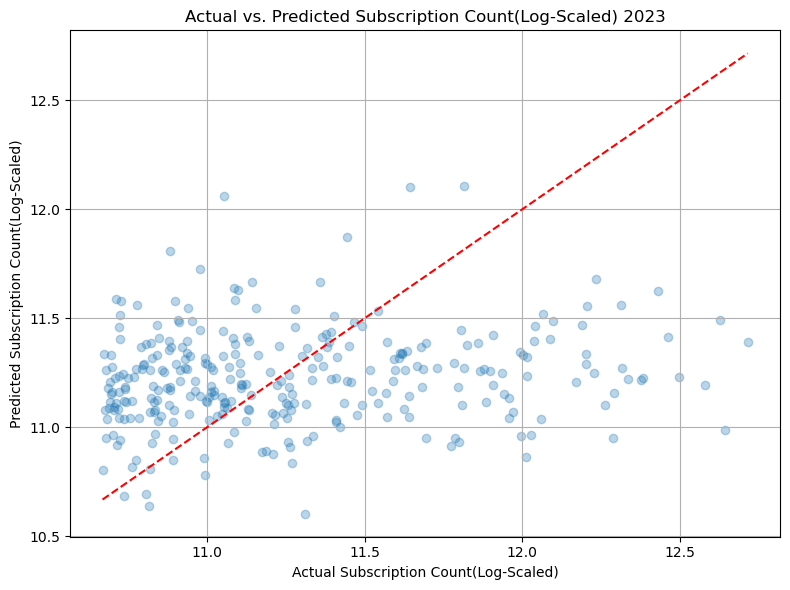

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Subscription Count(Log-Scaled)")
plt.ylabel("Predicted Subscription Count(Log-Scaled)")
plt.title("Actual vs. Predicted Subscription Count(Log-Scaled) 2023")
plt.grid(True)
plt.tight_layout()
plt.savefig('images/sample_model_prediction.png')
plt.show()

#### Pipeline

In [69]:
features_col = categories_col + all_tags_23
features_df = df_23[features_col]
target_df = df_23["Subscription Count"]
features, target = features_df.compute(), target_df.compute()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

In [70]:
preprocessor = Pipeline(steps=[
    ('categorizer', Categorizer(columns=categories_col)), 
    ('encoder', DummyEncoder(columns=categories_col)) 
])

full_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', Ridge())
])

In [71]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('categorizer',
                                  Categorizer(columns=['Perspective',
                                                       'Update Status',
                                                       'Originality', 'Romance',
                                                       'Setting', 'Theme',
                                                       'Contract Status'])),
                                 ('encoder',
                                  DummyEncoder(columns=['Perspective',
                                                        'Update Status',
                                                        'Originality',
                                                        'Romance', 'Setting',
                                                        'Theme',
                                                        'Contract Status']))])),
                ('regressor', Ridge())])

In [72]:
full_pipeline.steps

[('preprocessing',
  Pipeline(steps=[('categorizer',
                   Categorizer(columns=['Perspective', 'Update Status',
                                        'Originality', 'Romance', 'Setting',
                                        'Theme', 'Contract Status'])),
                  ('encoder',
                   DummyEncoder(columns=['Perspective', 'Update Status',
                                         'Originality', 'Romance', 'Setting',
                                         'Theme', 'Contract Status']))])),
 ('regressor', Ridge())]

In [73]:
def model_analysis(model, X_test, y_test):
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return rmse, r2

In [74]:
rmse, r2 = model_analysis(full_pipeline, X_test, y_test)

print("RMSE:", rmse)
print("R² Score:", r2)

RMSE: 0.25520422175756596
R² Score: -0.06313805452757393


In [75]:
def feature_analysis(model):
    regressor = model.named_steps['regressor']

    coef_df = pd.DataFrame({
        'Feature': regressor.feature_names_in_,
        'Coefficient': regressor.coef_
    }).sort_values(by='Coefficient', ascending=False)

    return coef_df

In [76]:
coef_df = feature_analysis(full_pipeline)

# Top positive contributors
print("Top positive contributors:")
print(coef_df.head(10))

# Top negative contributors
print("\nTop negative contributors:")
print(coef_df.tail(10))

Top positive contributors:
    Feature  Coefficient
216    国风幻想     0.786900
69       唐穿     0.676479
144      虫族     0.649484
57     神话传说     0.601504
52       暖男     0.510909
215      秦穿     0.467926
71       吐槽     0.421452
176      热血     0.399029
203      权谋     0.393052
47     三国穿越     0.387239

Top negative contributors:
      Feature  Coefficient
243  Theme_剧情    -0.234118
67         虐文    -0.234572
25         生子    -0.246076
119        腹黑    -0.259850
51        古穿今    -0.264390
181      史诗奇幻    -0.289522
97         开挂    -0.295862
76        反套路    -0.348386
74        红楼梦    -0.410934
126        机甲    -0.413185


We can see here some top positive contributors include 'Chinese Fantasy Fiction: 0.786900', 'Tang Dynasty Time Travel: 0.676479', 'Mythology: 0.601504', 'Qin Dynasty Time Travel: 0.467926', etc.  
The rise of narratives centered on Chinese history, mythology, and dynastic time travel may reflect deeper currents of social cohesion and national identity. By revisiting shared cultural touchstones—such as legendary figures, dynastic eras, and foundational myths—these stories foster a collective memory that strengthens social bonds. In doing so, they not only entertain but also contribute to the symbolic recognition of the nation as a distinct cultural entity with a rich and continuous past. This symbolic reaffirmation nurtures a "national spirit", reinforcing pride in cultural heritage and a sense of unity in an increasingly globalized and digitized world. Through literature and media, such themes offer a space where historical imagination becomes a tool for cultural continuity, identity affirmation, and soft power projection.

#### For All Years

In [78]:
results = []

for year in range(2003, 2025):
    df = load_dask_df(year) 
    df, all_tags = process_attributes(df)

    features_col = categories_col + all_tags
    features_df = df[features_col]
    features_df.columns = features_df.columns.astype(str)
    target_df = df["Subscription Count"]
    features, target = features_df.compute(), target_df.compute()

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
    full_pipeline.fit(X_train, y_train)
    print(f'Trained Model for {year}')

    rmse, r2 = model_analysis(full_pipeline, X_test, y_test)
    coef_df = feature_analysis(full_pipeline)

    coef_df["year"] = year

    results.append({
        "year": year,
        "rmse": rmse,
        "r2_score": r2,
        "coef_df": coef_df
    })

/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2003


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2004


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2005


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2006


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2007


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2008


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2009


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2010


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2011


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2012


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2013


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2014


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2015


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2016


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2017


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2018


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2019


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2020


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2021


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2022


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2023


/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
/var/folders/6d/fyqclspj02dcr6qdd_tdzjf80000gn/T/ipykernel_7527/3261452393.py:15: FutureWarning: The default value of observed=Fal

Trained Model for 2024


In [84]:
# Convert metrics to DataFrame for easy plotting
metrics_df = pd.DataFrame(results)

In [85]:
metrics_df

,year,rmse,r2_score,coef_df
0,2003,2.435736,0.194646,Feature Coefficient year 52 ...
1,2004,1.494093,0.114773,Feature Coefficient year 39 ...
2,2005,1.301494,0.128810,Feature Coefficient year 42 ...
3,2006,0.972973,0.132719,Feature Coefficient year 14 ...
4,2007,0.919671,-0.014186,Feature Coefficient year 130 Theme_童话...
5,2008,0.594201,-0.081521,Feature Coefficient year 131 ...
6,2009,0.441786,-0.114248,Feature Coefficient year 153 ...
7,2010,0.400393,-0.036543,Feature Coefficient year 154 ...
8,2011,0.500533,0.006437,Feature Coefficient year 31 ...
9,2012,0.507645,-0.029489,Feature Coefficient year 183 ...


In [87]:
# Combine all yearly coef_dfs into one
all_coefs_df = pd.concat([res["coef_df"] for res in results], ignore_index=True)

In [88]:
all_coefs_df

,Feature,Coefficient,year
0,恋爱合约,1.126100,2003
1,强强,1.119178,2003
2,虐文,0.795472,2003
3,都市,0.775453,2003
4,Theme_传奇,0.725169,2003
...,...,...,...
4135,打脸,-0.261624,2024
4136,近水楼台,-0.272854,2024
4137,Perspective_主攻,-0.279614,2024
4138,游戏网游,-0.319102,2024


With these results, we can explore how certain features positively or negatively impact log-scaled subscription count. 

In [100]:
token_df = all_coefs_df[all_coefs_df["Feature"] == "国风幻想"]

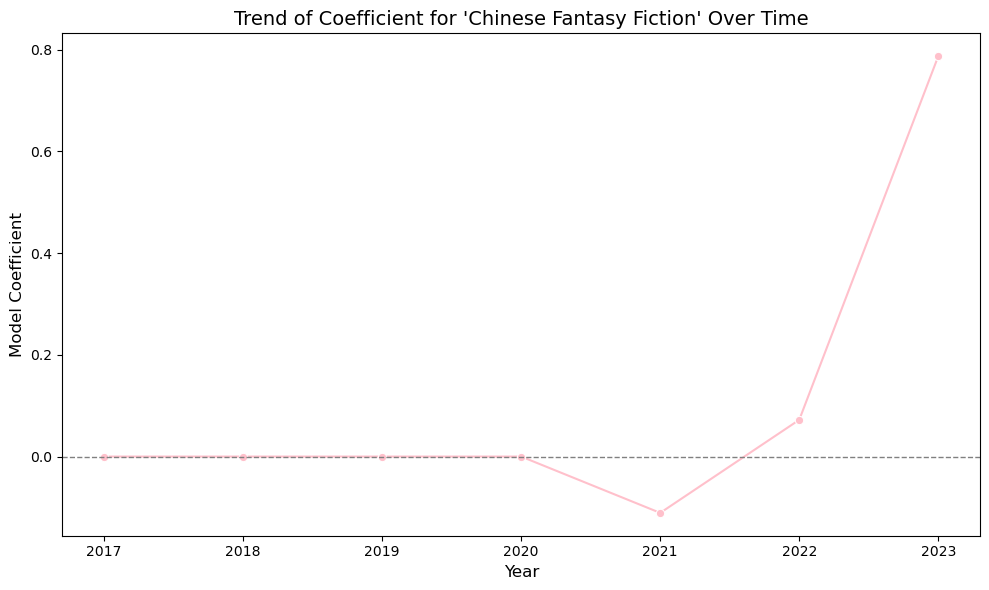

In [101]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=token_df, x="year", y="Coefficient", marker="o", color = 'pink')
plt.title("Trend of Coefficient for 'Chinese Fantasy Fiction' Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Model Coefficient", fontsize=12)
plt.axhline(0, linestyle="--", color="gray", linewidth=1)
plt.tight_layout()
plt.savefig('images/sample_tag_model_coef_trend.png')
plt.show()

**Reflection**:  
The modeling is rudimentary and needs more work to 1) select a better model and 2) account for sparse data structure.  

## Close

In [ ]:
# cluster.close()

## References

China Internet Network Information Center. (2024). The 54th statistical report on china’s internet development. Retrieved April 12, 2025, from https://www.cnnic.com.cn/ IDR/ReportDownloads/202411/P020241101318428715781.pdf  
Zhao, E. J. (2017). Writing on the assembly line: Informal labour in the formalised online literature market in china. New Media & Society, 19(8), 1236–1252. https://doi. org/10.1177/1461444816634675  

[Dask Preprocessing](https://ml.dask.org/preprocessing.html)  
[Dask Dataframe](https://docs.dask.org/en/latest/dataframe.html)  
[Bokeh](https://docs.bokeh.org/en/3.0.2/docs/user_guide/styling/plots.html)  
[Jieba](https://github.com/fxsjy/jieba?tab=readme-ov-file)  